**Advance Programming and Master Data Science**

BATCH NO: DW09

TASK: 07

Assignment No:12

NAME: T Prashant

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [5]:
import pandas as pd

In [6]:
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

**Importing the dataset**

In [7]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [10]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
from sklearn import preprocessing
data["Gender"]=data[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)

In [12]:
data=data.drop(columns="User ID")
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


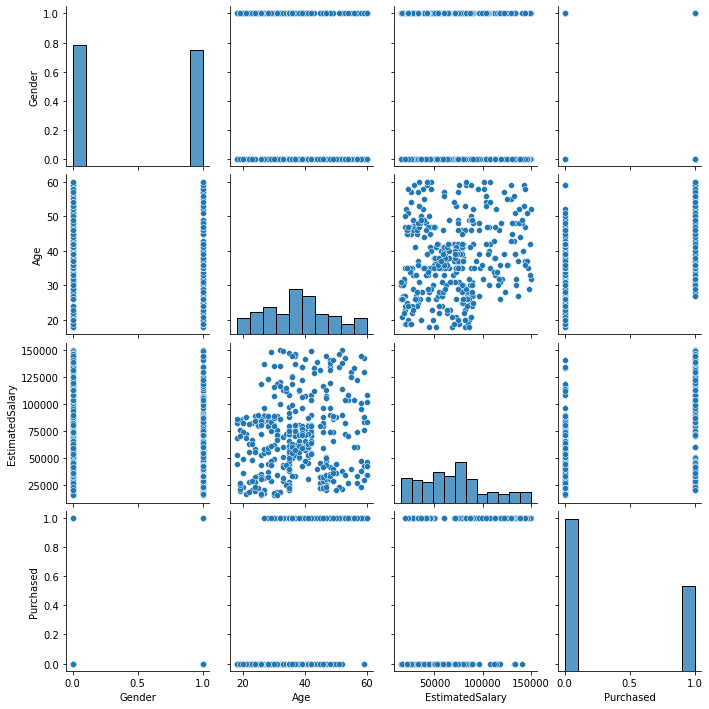

In [13]:
import seaborn as sns
sns.pairplot(data)

In [14]:
X=data.drop(columns="Purchased")
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [15]:
Y=data["Purchased"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

print("Xtrain shape: ",X_train.shape)
print("Ytest shape: ",Y_test.shape)
print("Xtrain shape: ",X_train.shape)
print("Ytest shape: ",Y_test.shape)

Xtrain shape:  (320, 3)
Ytest shape:  (80,)
Xtrain shape:  (320, 3)
Ytest shape:  (80,)


**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
Y_test_scaled=scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [19]:
Y_predict=KNN.predict(X_test)
Y_predict

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

**Making the Confusion Matrix**

In [20]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predict)

print("Confusion matrix\n\n",cm)
print("\nTrue Positive(TP):",cm[0,0])
print("\nTrue Negative(TN):",cm[1,1])
print("\nFalse Positive(TP):",cm[0,1])
print("\nFalse Positive(TP):",cm[1,0])

Confusion matrix

 [[46  7]
 [10 17]]

True Positive(TP): 46

True Negative(TN): 17

False Positive(TP): 7

False Positive(TP): 10


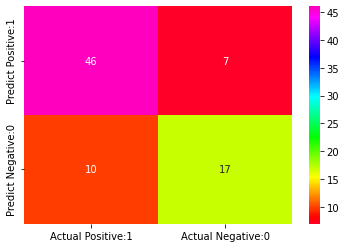

In [21]:
cm_matrix=pd.DataFrame(data=cm,columns=["Actual Positive:1","Actual Negative:0"],
                       index=["Predict Positive:1","Predict Negative:0"])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap="gist_rainbow")

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        53
           1       0.71      0.63      0.67        27

    accuracy                           0.79        80
   macro avg       0.76      0.75      0.76        80
weighted avg       0.78      0.79      0.78        80



Test set accuracy: 0.79
Train set auc: 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


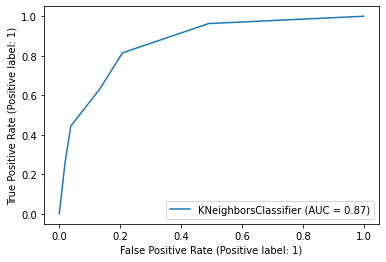

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily
# Compute test set accuracy
acc = accuracy_score(Y_test, Y_predict)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(Y_test, Y_predict)
print("Train set auc: {:.2f}".format(acc))
plot_roc_curve(KNN, X_test, Y_test)